In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

# Amex Metric

In [2]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

# print(amex_metric(train_labels, ave_p2)) # 0.572773

# Load training data

In [3]:
df_train = pd.read_csv('../input/train_data.csv')
df_labels = pd.read_csv('../input/train_labels.csv')

In [4]:
df_train.shape

(5531451, 190)

In [5]:
df_labels.shape

(458913, 2)

In [14]:
pd.set_option('display.max_columns', None)
df_train.head(10)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [7]:
print(f'Train data memory usage: {df_train.memory_usage().sum() / 1e9} GBytes')

Train data memory usage: 8.407805648 GBytes


In [8]:
# one sample
df_train[df_train["customer_ID"] == '0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a']

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,NaN,NaN,NaN,0.001924,0.008598,0.004529,NaN,0.000674,0.002223,0.002884
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,NaN,NaN,NaN,0.001336,0.004361,0.009387,NaN,0.007727,0.007661,0.002225
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,NaN,NaN,NaN,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950845,0.009896,0.016888,1.003995,0.001789,0.102792,0.002519,0.009817,...,NaN,NaN,NaN,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868580,0.001082,0.001930,1.007504,0.001772,0.100470,0.004626,0.006073,...,NaN,NaN,NaN,0.003611,0.009607,0.007266,NaN,0.008763,0.004753,0.009068


In [9]:
# label of the selected sample
df_labels[df_labels['customer_ID'] == '0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a']

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0


# EDA 

In [10]:
## show all columns

all_cols = list(df_train.columns)
print(all_cols)

['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_2

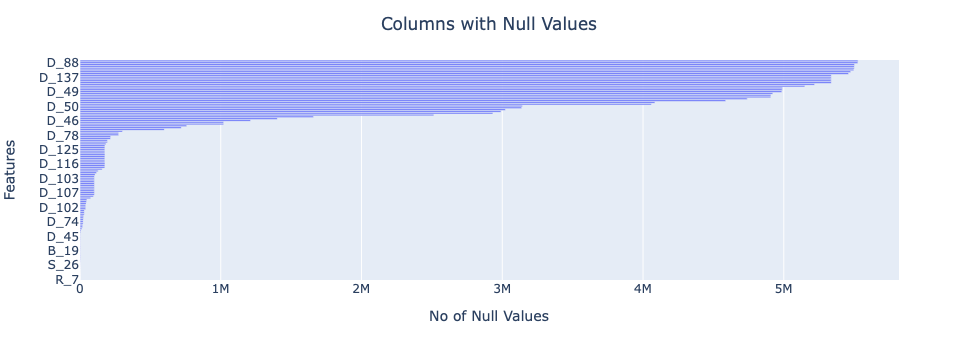

In [21]:
## check null value
df_null = pd.DataFrame(df_train.isna().sum())
df_null = df_null[df_null[0]>0]
df_null = df_null.sort_values(by = 0 ,ascending = True)

fig = px.bar(x=df_null[0],y=df_null.index)
fig.update_layout(showlegend=False, 
                  title_text="Columns with Null Values", 
                  title_x=0.5,
                  xaxis_title="No of Null Values",
                  yaxis_title="Features")
fig.show()

In [12]:
pd.set_option('display.max_columns', None)
df_train.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,5.257132e+06,5.531451e+06,5.529434e+06,5.531451e+06,5.531451e+06,4.319752e+06,5.531451e+06,4.812726e+06,5.455340e+05,5.531218e+06,5.531451e+06,5.509183e+06,2.389049e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.501888e+06,5.229959e+06,5.531451e+06,1.446866e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.531451e+06,5.531451e+06,5.346648e+06,2.540508e+06,5.481932e+06,5.531451e+06,5.531451e+06,2.597808e+06,5.531451e+06,5.424726e+06,5.531451e+06,4.933399e+06,5.524528e+06,5.531451e+06,4.773290e+06,5.531451e+06,5.529435e+06,2.393853e+06,5.531451e+06,5.529435e+06,623354.000000,5.529435e+06,5.314948e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.336978e+06,5.529435e+06,5.436534e+06,5.531451e+06,5.507743e+06,5.531451e+06,5.531451e+06,55856.000000,5.531451e+06,5.509678e+06,5.531451e+06,6.224970e+05,5.531451e+06,5.531450e+06,3.017539e+06,5.524528e+06,5.529435e+06,5.257132e+06,5.455512e+06,5.531451e+06,3.125330e+05,5.531451e+06,5.509678e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.505764e+06,1.472837e+06,5.531451e+06,5.531395e+06,5.531451e+06,5.531451e+06,5.336978e+06,5.531450e+06,5.531451e+06,5.501888e+06,5.531451e+06,3.814160e+05,5.529435e+06,5.531451e+06,5.531451e+06,3865.0,5.531451e+06,5.531451e+06,6004.000000,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531376e+06,5.531451e+06,5.529435e+06,5.501888e+06,5.531451e+06,5.531451e+06,5.374235e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.512427e+06,5.531006e+06,5.512858e+06,5.518604e+06,5.530817e+06,5.490796e+06,5.429903e+06,5.429903e+06,2.510020e+06,5.413490e+05,5.429903e+06,5.531451e+06,5.531395e+06,6.093050e+05,5.402748e+06,5.529435e+06,2.893800e+04,5.529854e+06,31334.000000,31334.000000,33632.000000,5.528801e+06,5.531398e+06,4.130516e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.414635e+06,5.531451e+06,5.429903e+06,5.429903e+06,5.530761e+06,71478.000000,5.429903e+06,5.429903e+06,542577.000000,5.488735e+06,5.531451e+06,194699.000000,1.946990e+05,1.946990e+05,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06
mean,6.563340e-01,1.531172e-01,1.240100e-01,6.214887e-01,7.880270e-02,2.258455e-01,5.978469e-02,1.325389e-01,0.184974,1.546841e-01,1.184431e-01,1.725543e-01,2.521867e-01,8.311185e-02,4.751791e-02,4.754784e-01,4.071093e-01,3.816245e-01,1.919254e-01,1.521174e-01,1.860836e-01,4.505812e-01,1.744347e-01,1.450790e-01,1.895237e-01,1.208287e-01,1.800504e-01,6.012886e-01,2.316003e-01,7.618341e-02,8.810534e-02,1.109685e-01,2.441923e-01,9.846392e-01,3.120413e-02,2.231380e-01,9.369956e-02,3.275998e-01,2.980905e-01,2.037094e-01,1.007155e-01,3.459403e-02,2.155312e-01,7.441472e-02,1.011546e-01,3.624224e-01,3.761550e-01,4.296291e-01,5.280

In [16]:
df_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


# Feature Engineering

In [17]:
features = df_train.drop(['customer_ID', 'S_2'], axis=1).columns.to_list()
cat_features = [
    "B_30",
    "B_38",
    "D_114",
    "D_116",
    "D_117",
    "D_120",
    "D_126",
    "D_63",
    "D_64",
    "D_66",
    "D_68",
]
num_features = [col for col in features if col not in cat_features]

In [32]:
df_train_num = df_train.groupby("customer_ID")[num_features].agg(['mean', 'std', 'min', 'max', 'last'])
df_train_num.columns = ['_'.join(x) for x in df_train_num.columns]
df_train_cat = df_train.groupby("customer_ID")[cat_features].agg(['count', 'last', 'nunique'])
df_train_cat.columns = ['_'.join(x) for x in df_train_cat.columns]
df_train = pd.concat([df_train_num, df_train_cat], axis=1)

In [35]:
df_train = df_train.merge(df_labels,on='customer_ID',how='left')

In [51]:
df_train['D_117_nunique']

0         1
1         1
2         1
3         2
4         1
         ..
458908    2
458909    2
458910    1
458911    2
458912    1
Name: D_117_nunique, Length: 458913, dtype: int64

In [37]:
df_null = pd.DataFrame(df_train.isna().sum())
df_null = df_null[df_null[0]>0]
df_null = df_null.sort_values(by = 0 ,ascending = True)

In [41]:
df_null[df_null[

customer_ID  P_2_mean  P_2_std  P_2_min  P_2_max  P_2_last  D_39_mean  \
0             False     False    False    False    False     False      False   
1             False     False    False    False    False     False      False   
2             False     False    False    False    False     False      False   
3             False     False    False    False    False     False      False   
4             False     False    False    False    False     False      False   
...             ...       ...      ...      ...      ...       ...        ...   
458908        False     False    False    False    False     False      False   
458909        False     False    False    False    False     False      False   
458910        False     False    False    False    False     False      False   
458911        False     False    False    False    False     False      False   
458912        False     False    False    False    False     False      False   

        D_39_std  D_39_min  D_39_max  D_39_last  B_1_mean  B_1_std  B_1_min  \
0          False     False     False      False     False    False    False   
1          False     False     False      False     False    False    False   
2          False     False     False      False     False    False    False   
3          False     False     False      False     False    False    False   
4          False     False     False      False     False    False    False   
...          ...       ...       ...        ...       ...      ...      ...   
458908     False     False     False      False     False    False    False   
458909     False     False     False      False     False    False    False   
458910     False     False     False      False     False    False    False   
458911     False     False     False      False     False    False    False   
458912     False     False     False      False     False    False    False   

        B_1_max  B_1_last  B_2_mean  B_2_std  B_2_min  B_2_max  B_2_last  \
0         False     False     False    False    False    False     False   
1         False     False     False    False    False    False     False   
2         False     False     False    False    False    False     False   
3         False     False     False    False    False    False     False   
4         False     False     False    False    False    False     False   
...         ...       ...       ...      ...      ...      ...       ...   
458908    False     False     False    False    False    False     False   
458909    False     False     False    False    False    False     False   
458910    False     False     False    False    False    False     False   
458911    False     False     False    False    False    False     False   
458912    False     False     False    False    False    False     False   

        R_1_mean  R_1_std  R_1_min  R_1_max  R_1_last  S_3_mean  S_3_std  \
0          False    False    False    False     False     False    False   
1          False    False    False    False     False     False    False   
2          False    False    False    False     False      True     True   
3          False    False    False    False     False     False    False   
4          False    False    False    False     False     False    False   
...          ...      ...      ...      ...       ...       ...      ...   
458908     False    False    False    False     False     False    False   
458909     False    False    False    False     False     False    False   
458910     False    False    False    False     False     False    False   
458911     False    False    False    False     False     False    False   
458912     False    False    False    False     False     False    False   

        S_3_min  S_3_max  S_3_last  D_41_mean  D_41_std  D_41_min  D_41_max  \
0         False    False     False      False     False     False     False   
1         False    False     False      False     False     False     False   
2          True     Tru